In [1]:
# Step 1- Exploratory Data Analysis: 
# Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations. 

#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
df = pd.read_csv("creditcard.csv")

In [3]:
# Display the first few rows of the dataset

print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Check for missing values

print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Basic statistics of the dataset

print("\nDataset statistics:")
print(df.describe())


Dataset statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  

In [6]:
# Check class distribution

print("\nClass distribution:")
print(df['Class'].value_counts())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


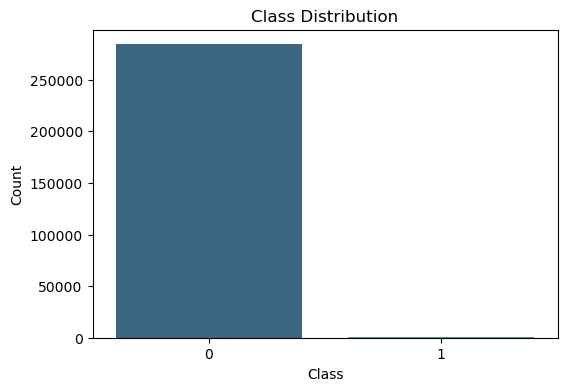

In [8]:
# Visualizing the class distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [9]:
# Step 2- Data Cleaning: 
# It include standardization, handling the missing values and outliers in the data. 

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Handle Missing Values
print("\nChecking for missing values...")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() > 0:
    print("\nHandling missing values...")
    # Fill missing numerical values with the median
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

# Handle Outliers (Using IQR for 'Amount')
print("\nHandling outliers...")
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Standardization
print("\nStandardizing numerical features...")
scaler = StandardScaler()

# Standardizing 'Amount' column
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Standardizing 'Time' column
df['Time'] = scaler.fit_transform(df[['Time']])

# Confirm cleaning
print("\nData cleaning completed. First few rows of the cleaned dataset:")
print(df.head())


Checking for missing values...
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Handling outliers...

Standardizing numerical features...

Data cleaning completed. First few rows of the cleaned dataset:
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.995729 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.995729  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
3 -1.995708 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.995687 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5 -1.995687 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   

        

In [10]:
# Step 3- Dealing with Imbalanced data: 
# This data set is highly imbalanced. The data should be balanced using the appropriate methods before moving onto model building.

# Importing required libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Splitting the data into features (X) and target (y)
X = df.drop(columns=['Class'])  # Drop the target column
y = df['Class']                 # Target column

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking class distribution before resampling
print("Class distribution before resampling:")
print(Counter(y_train))

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking class distribution after resampling
print("Class distribution after resampling:")
print(Counter(y_train_resampled))

Class distribution before resampling:
Counter({0: 202001, 1: 321})
Class distribution after resampling:
Counter({0: 202001, 1: 202001})


In [11]:
# Step 4- Feature Engineering: 
#Create new features or transform the existing features for better performance of the ML Models. 

# Log Transform the 'Amount' column to handle skewness
df['Log_Amount'] = np.log1p(df['Amount'])  # log1p to handle zero values

# Create meaningful time-based features

# Assuming 'Time' is the seconds elapsed since the first transaction
df['Hour'] = (df['Time'] // 3600) % 24  # Convert seconds to hours

# Create a feature for parts of the day
def get_day_part(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['Day_Part'] = df['Hour'].apply(get_day_part)

# Rolling statistics on transaction amounts
df['Rolling_Mean_Amount'] = df['Amount'].rolling(window=10).mean().fillna(df['Amount'].mean())
df['Rolling_Std_Amount'] = df['Amount'].rolling(window=10).std().fillna(df['Amount'].std())

# Encode categorical features (if 'Day_Part' is categorical)
df = pd.get_dummies(df, columns=['Day_Part'], drop_first=True)

# Confirm the feature engineering
print("\nNew features added:")
print(df.head())


New features added:
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.995729 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.995729  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
3 -1.995708 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.995687 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5 -1.995687 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   

         V7        V8        V9  ...       V26       V27       V28    Amount  \
0  0.239599  0.098698  0.363787  ... -0.189115  0.133558 -0.021053  2.718502   
1 -0.078803  0.085102 -0.255425  ...  0.125895 -0.008983  0.014724 -0.765550   
3  0.237609  0.377436 -1.387024  ... -0.221929  0.062723  0.061458  2.099136   
4  0.592941 -0.270533  0.817739  ...  0.502292  0.219422  0.215153  0.830290   
5  0.476201  0.260314 -0.568671  ...  0.105915  0.253844  0.081080 -0.742312   

   Class  Log_Amount  Hour  Rolling_Mean_Amount

In [12]:
# Step 5- Model Selection: 
#Choose the most appropriate model that can be used for this project. 


# Logistic Regression (Baseline)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train the Logistic Regression model
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


# Random Forest (Advanced)

from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


# Gradient Boosting (XGBoost)

!pip install xgboost
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=len(y_train_resampled) / sum(y_train_resampled), random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nXGBoost Results:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))





Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50501
           1       0.07      0.94      0.13        80

    accuracy                           0.98     50581
   macro avg       0.54      0.96      0.56     50581
weighted avg       1.00      0.98      0.99     50581

ROC-AUC Score: 0.9778620720381774

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50501
           1       0.89      0.90      0.89        80

    accuracy                           1.00     50581
   macro avg       0.94      0.95      0.95     50581
weighted avg       1.00      1.00      1.00     50581

ROC-AUC Score: 0.9776690065543256
Defaulting to user installation because normal site-packages is not writeable

XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50501
           1       

In [13]:
# Step 6- Model Training: 
# Split the data into train & test sets and use the train set to estimate the best model parameters.

In [14]:
# To train a model and estimate the best parameters, We will follow these steps:

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate features and target variable
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable (fraud or not)

# Handle missing values by filling with the median
X = X.fillna(X.median())

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle data imbalance using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Define a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model to the training data
print("Training the model...")
grid_search.fit(X_train, y_train)

# Retrieve the best model and its parameters
best_model = grid_search.best_estimator_
print("\nBest Parameters Found:")
print(grid_search.best_params_)

# Save the best model for further use (optional)
import joblib
joblib.dump(best_model, 'best_model.pkl')

# Evaluate the model on the training set
print("\nTraining Performance:")
y_train_pred = best_model.predict(X_train)
y_train_proba = best_model.predict_proba(X_train)[:, 1]
print("ROC-AUC on Training Set:", roc_auc_score(y_train, y_train_proba))
print("Classification Report on Training Set:")
print(classification_report(y_train, y_train_pred))

Training the model...
Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# Step 7- Model Validation: 
# Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting. 

In [ ]:
#  Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Split Data into Training and Testing Sets-

# Load dataset
data = pd.read_csv('creditcard.csv')

# Preprocessing
X = data[['V1', 'V2', 'V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Time']]
y = data['Class']  

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Model-

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)


# Evaluate on Test Set-

# Predict on test data
y_pred = model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')


# Cross-Validation-

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV R^2 Score: {np.mean(cv_scores)}')


# Check for Overfitting-

# Train performance
train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print(f'Training MSE: {train_mse}')
print(f'Training R^2: {train_r2}')

# Test performance
print(f'Testing MSE: {mse}')
print(f'Testing R^2: {r2}')


# Residual Analysis-

import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
# Step 8- Model Deployment: 
#Model deployment is the process of making a trained machine learning model available for use in a production environment. 